# Portfolio Optimization | Mean-Variance Method

In [353]:
!pip install yfinance datetime pandas numpy matplotlib plotly seaborn PyPortfolioOpt  

In [354]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

#Visualisation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#Lib Optimisation
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.plotting import plot_weights
from pypfopt import risk_models
from pypfopt.risk_models import exp_cov
from pypfopt.cla import CLA
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier


#données de yahoo finance
import yfinance as yf

In [355]:
Stocks = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'META',  # Meta Platforms, Inc. (formerly Facebook)
    'AMZN',  # Amazon.com, Inc.
    'XOM',   # Exxon Mobil Corporation
    'UNH',   # UnitedHealth Group Incorporated
    'JNJ',   # Johnson & Johnson
    'V',     # Visa Inc.
    'HD',    # The Home Depot, Inc.
    'ABBV',  # AbbVie Inc.
    'KO',    # The Coca-Cola Company
    'DIS',   # The Walt Disney Company
    'T',     # AT&T Inc.
    'UPS',   # United Parcel Service, Inc.
    'LMT',   # Lockheed Martin Corporation
    'CAT',   # Caterpillar Inc.
    'F',     # Ford Motor Company
    'MAR',   # Marriott International, Inc.
    'O',     # Realty Income Corporation
    'HSY'    # Hershey Company
]
last_date = "2024-06-28" 
init_date = "2018-01-01" #date initiale
print("D:",init_date,"F: ",last_date)

D: 2018-01-01 F:  2024-06-28


In [356]:
#Téléchargement des donées de Yahoo finance 
stocks_data = yf.download(Stocks, start=init_date, end=last_date,auto_adjust=False)
stocks_data.head()

[*********************100%***********************]  20 of 20 completed


Price       Adj Close                                                          \
Ticker           AAPL       ABBV       AMZN         CAT         DIS         F   
Date                                                                            
2018-01-02  40.479836  71.669937  59.450500  133.353867  107.399284  8.594533   
2018-01-03  40.472790  72.791473  60.209999  133.557632  107.860382  8.662419   
2018-01-04  40.660789  72.376335  60.479500  135.391876  107.812363  8.811769   
2018-01-05  41.123714  73.636276  61.457001  137.531799  107.226364  8.961122   
2018-01-08  40.970978  72.456474  62.343498  140.987930  105.689346  8.927178   

Price                                                     ...   Volume  \
Ticker              HD        HSY         JNJ         KO  ...      LMT   
Date                                                      ...            
2018-01-02  157.680359  94.892525  113.850288  36.272221  ...  1189600   
2018-01-03  158.502167  94.494698  114.937828  36.192562  ...   893400   
2018-01-04  159.760040  95.154915  114.929688  36.702332  ...  1443000   
2018-01-05  161.428833  95.611969  115.878212  36.694347  ...  1241100   
2018-01-08  161.043045  96.543037  116.025398  36.638599  ...  1084500   

Price                                                                         \
Ticker          MAR      META      MSFT        O         T      UNH      UPS   
Date                                                                           
2018-01-02  2949200  18151900  22483800  1672872  42626974  3485000  5413000   
2018-01-03  1507900  16886600  26061400  1593408  51851150  2417600  5655600   
2018-01-04  3187000  13880900  21912000  1939334  36894187  2749100  5473100   
2018-01-05  3404400  13574500  23407100  1471219  29386048  2432800  3699200   
2018-01-08  3275500  17994700  22113000  1133342  35276524  2850800  3243000   

Price                          
Ticker            V       XOM  
Date                           
2018-01-02  6080900  11469300  
2018-01-03  6946100  13957700  
2018-01-04  7805300  10863000  
2018-01-05  8590500  11047600  
2018-01-08  6660700  10927100  

[5 rows x 120 columns]

In [357]:
portfolio_returns = stocks_data['Adj Close'].pct_change().dropna() # rendements quotidiens [(prix actuel-prix préc)/prix préc ]

portfolio_returns_cumprod = portfolio_returns.add(1).cumprod().sub(1)*100 #rendements cumulés à partir des rendements quotidiens
#visualisation 
fig = px.line(portfolio_returns_cumprod,
              x=portfolio_returns_cumprod.index,
              y=portfolio_returns_cumprod.columns,
              title = f"Rendements Cumulés de: {init_date} à {last_date}")

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Rendement Cumulé en %')

fig.show()

<Axes: xlabel='Ticker', ylabel='Ticker'>

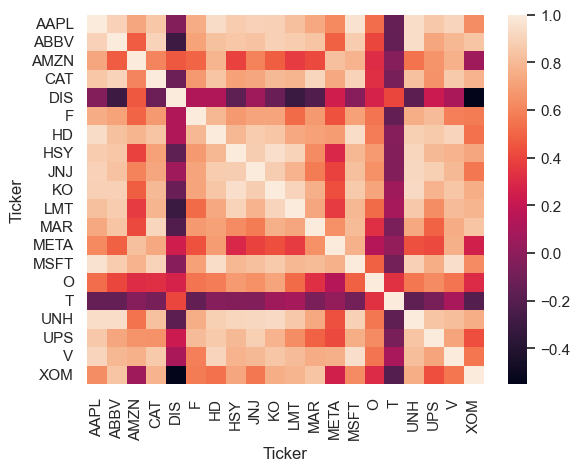

In [358]:
#Matrice de corrélation normalisée 
portfolio_correlation = portfolio_returns_cumprod.corr()

sns.heatmap(portfolio_correlation)

In [359]:
train_date = "2021-05-30"
test_date = "2021-05-31"
train = portfolio_returns[:train_date] #training set pour estimer les paramètres
test = portfolio_returns[test_date:] # test set pour évaluer les performances
# Estimation des rendements attendus (méthode exponentially weighted moving average EMA/ moyenne mobile pondérée exponentiellement)
est_returns = expected_returns.ema_historical_return(train, returns_data = True, span = 500)
#Matrice de covariance 
cov_matrix = risk_models.exp_cov(train, returns_data = True, span = 180)

In [360]:
print(est_returns)
cov_matrix

Ticker
AAPL    0.482579
ABBV    0.310709
AMZN    0.325962
CAT     0.631792
DIS     0.348453
F       0.840881
HD      0.362709
HSY     0.290996
JNJ     0.204723
KO      0.168178
LMT     0.132250
MAR     0.337955
META    0.500465
MSFT    0.442765
O       0.219010
T       0.064655
UNH     0.442568
UPS     0.679428
V       0.264695
XOM     0.283278
Name: 2021-05-28 00:00:00, dtype: float64


Ticker,AAPL,ABBV,AMZN,CAT,DIS,F,HD,HSY,JNJ,KO,LMT,MAR,META,MSFT,O,T,UNH,UPS,V,XOM
Ticker,,,,,,,,,,,,,,,,,,,,
AAPL,0.103015,0.020990,0.061959,0.006956,0.017543,0.022076,0.033522,0.015199,0.014210,0.018090,0.017079,0.026231,0.070331,0.063955,0.026345,0.007297,0.022056,0.032388,0.036554,0.012788
ABBV,0.020990,0.054969,0.010708,0.015004,0.014917,0.018007,0.020206,0.013939,0.016349,0.015837,0.014796,0.018670,0.011952,0.020752,0.017427,0.013604,0.024924,0.020021,0.023542,0.029428
AMZN,0.061959,0.010708,0.076726,-0.002649,0.011145,0.008055,0.021643,0.008995,0.004780,0.008183,0.007181,0.012568,0.065176,0.053983,0.012836,-0.001461,0.014834,0.022025,0.028197,0.001288
CAT,0.006956,0.015004,-0.002649,0.083326,0.042694,0.064523,0.018692,0.014845,0.017098,0.023460,0.025976,0.059515,-0.000307,0.008083,0.024632,0.029151,0.021081,0.019372,0.029993,0.061604
DIS,0.017543,0.014917,0.011145,0.042694,0.103632,0.048912,0.023338,0.016073,0.015022,0.029747,0.025828,0.069317,0.017706,0.021583,0.037891,0.026532,0.020797,0.019239,0.042753,0.049399
F,0.022076,0.018007,0.008055,0.064523,0.048912,0.215743,0.025157,0.007965,0.008658,0.026168,0.024702,0.087316,0.004829,0.018124,0.028290,0.035579,0.018735,0.025310,0.027049,0.065735
HD,0.033522,0.020206,0.021643,0.018692,0.023338,0.025157,0.059766,0.023239,0.017141,0.018688,0.024035,0.019569,0.030899,0.032095,0.027814,0.017958,0.031053,0.028745,0.024307,0.012672
HSY,0.015199,0.013939,0.008995,0.014845,0.016073,0.007965,0.023239,0.035819,0.018246,0.021491,0.018450,0.014067,0.020026,0.017046,0.022264,0.015431,0.025076,0.017487,0.022718,0.018800
JNJ,0.014210,0.016349,0.004780,0.017098,0.015022,0.008658,0.017141,0.018246,0.030498,0.018799,0.015935,0.014570,0.013335,0.015358,0.017342,0.016145,0.020802,0.015570,0.018596,0.019344


In [361]:
#frontière efficace
#Rendement 
gl_ret = np.arange(0, 0.840881, 0.01)
#Volatilité Optimale 
opt_vol = []
#Calculer la volatilité pour chaque rendement
for i in np.arange(0, 0.840881, 0.01):
    opt_portfolio = EfficientFrontier(est_returns, cov_matrix ) # calcul de efficient frontier
    opt_portfolio.efficient_return(i) #Maximise le rendement attendu avec volatilité minimale pour le rendement i donné
    opt_vol.append(opt_portfolio.portfolio_performance()[1])

In [362]:
opt_portfolio = EfficientFrontier(est_returns, cov_matrix) 
opt_portfolio.min_volatility() #minimise la volatilité du portefeuille
minVolatility_ret = opt_portfolio.portfolio_performance()[0] # rendement attendu  
minVolatility = opt_portfolio.portfolio_performance()[1] # volatilité 
print(minVolatility_ret)
print(minVolatility)

0.249792486554996
0.13569751012424233


In [363]:
opt_portfolio = EfficientFrontier(est_returns, cov_matrix)
opt_portfolio.max_sharpe(risk_free_rate=0.009) # maximise le ratio de Sharpe avec un taux de risk-free  = 0.9%
maxSharpe_ret = opt_portfolio.portfolio_performance()[0] #rendement attendu
maxSharpe_vol = opt_portfolio.portfolio_performance()[1] #volatilité 
print(maxSharpe_ret)
print(maxSharpe_vol)

0.5956764688285641
0.19035901996902038


C:\Users\003ke\anaconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



Text(0.5, 1.0, 'Efficient Frontier')

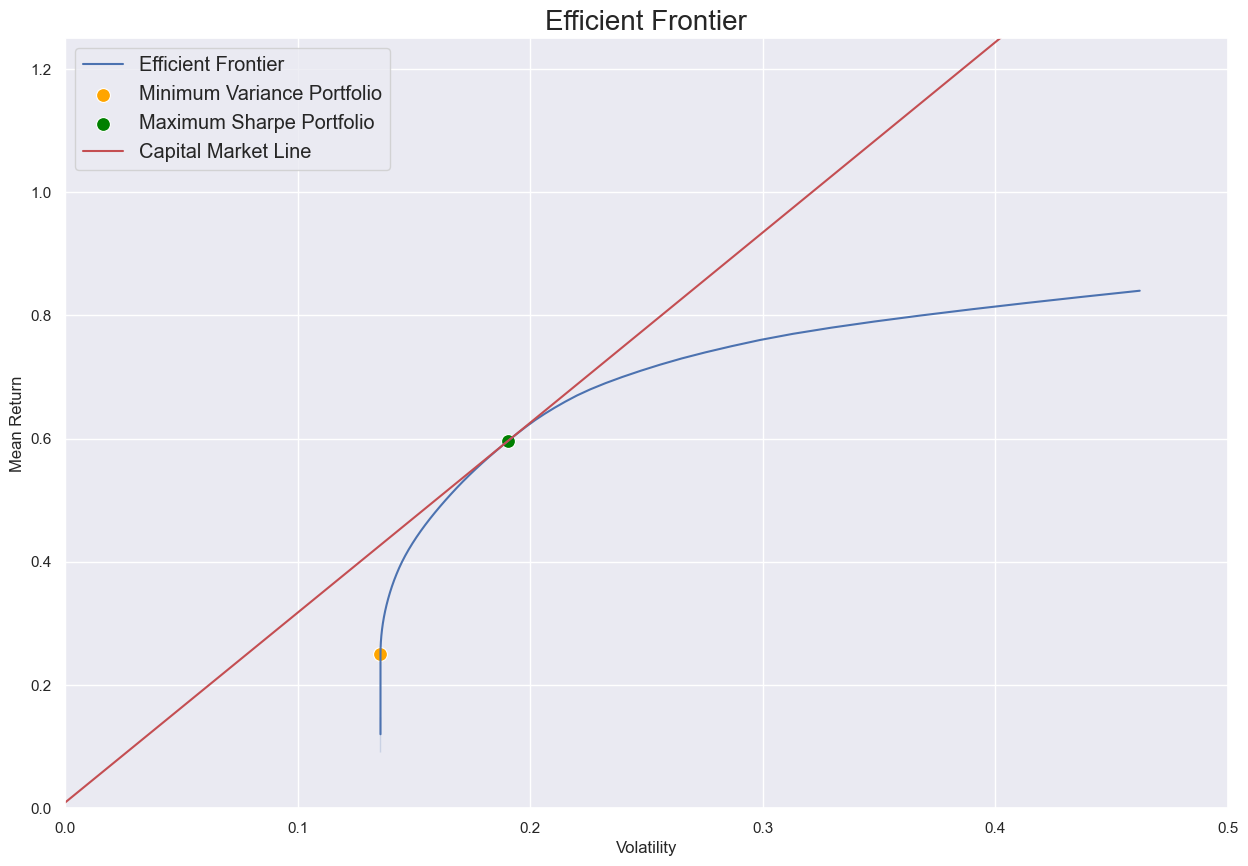

In [364]:
sns.set()

fig, ax = plt.subplots(figsize = [15,10])

sns.lineplot(x = opt_vol, y = gl_ret,
             label = "Efficient Frontier",
             ax = ax)

sns.scatterplot(x = [minVolatility], y = [minVolatility_ret],
                ax = ax,
                label = "Minimum Variance Portfolio",
                color = "orange", s = 100)

sns.scatterplot(x = [maxSharpe_vol], y = [maxSharpe_ret],
                ax = ax,
                label = "Maximum Sharpe Portfolio",
                color = "green", s = 100)

sns.lineplot(x = [0, maxSharpe_vol, 1], y = [0.009, maxSharpe_ret, 3.096],
             label = "Capital Market Line",
             ax = ax,
             color = "r")

ax.set(xlim = [0, 0.5])
ax.set(ylim = [0, 1.25])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize='large')
plt.title("Efficient Frontier", fontsize = '20')

Expected annual return: 25.0%
Annual volatility: 13.6%
Sharpe Ratio: 1.77


(0.249792486554996, 0.13569751012424233, 1.7744797700011627)

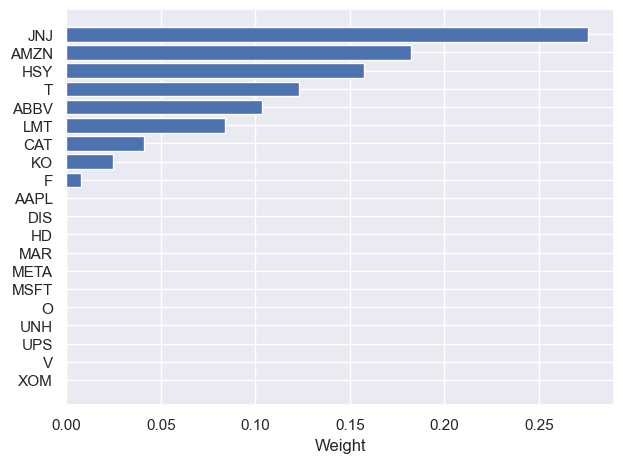

In [365]:
#  variance minimale
opt_portfolio = EfficientFrontier(est_returns, cov_matrix)
minvar_weights = opt_portfolio.min_volatility() # poids des actifs de variance minimale

plot_weights(minvar_weights) #visualiser les poids
opt_portfolio.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Expected annual return: 59.6%
Annual volatility: 19.0%
Sharpe Ratio: 3.08


(0.5956764688285641, 0.19035901996902038, 3.081947306326969)

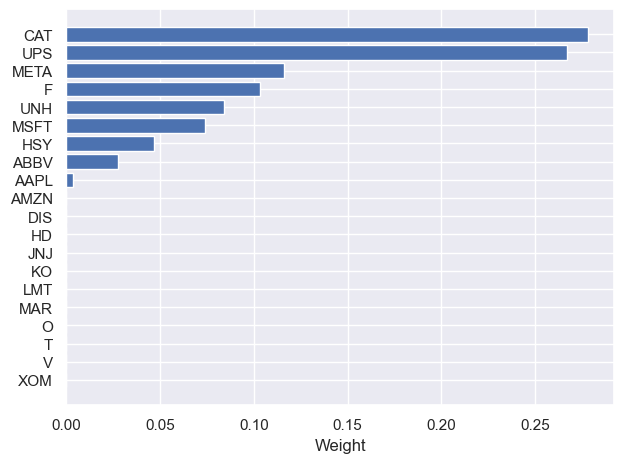

In [366]:
# Sharpe maximale
opt_portfolio = EfficientFrontier(est_returns, cov_matrix)
maxsharpe_weights = opt_portfolio.max_sharpe(risk_free_rate=0.009)

plot_weights(maxsharpe_weights) #visualiser les poids 
opt_portfolio.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [367]:
minvar_weights = list(minvar_weights.values())
maxsharpe_weights = list(maxsharpe_weights.values())

r1 = test.dot(minvar_weights).add(1).cumprod().subtract(1).multiply(100) # rendements cumulés pour variance min sur le test set
r2 = test.dot(maxsharpe_weights).add(1).cumprod().subtract(1).multiply(100) #rendements cumulés pour un ratio Sharpe max sur le test set

#Benchmark = S&P500 pour comparer la performance 
sp_data = yf.download('^GSPC', start=train_date, end=last_date, auto_adjust=False) 
sp_data.head()
ref_index = sp_data['Adj Close'].pct_change().add(1).cumprod().subtract(1).multiply(100) #rendements cumulés S&P 500

[*********************100%***********************]  1 of 1 completed


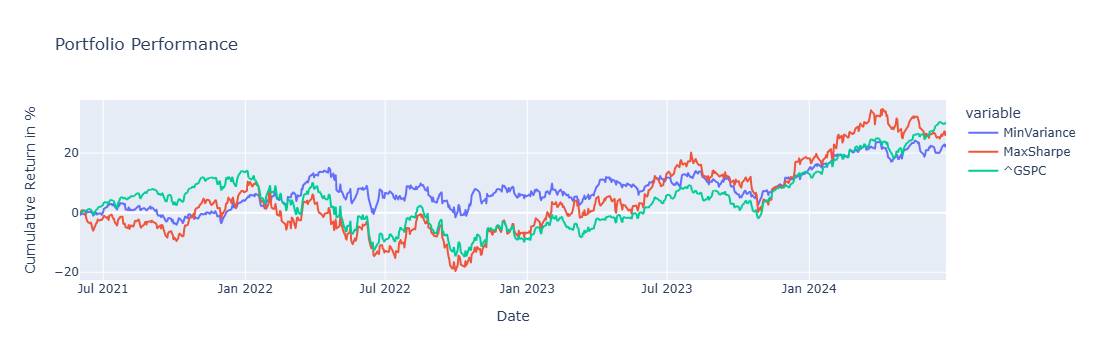

In [368]:
back = pd.DataFrame({"MinVariance":r1, "MaxSharpe":r2})
back = pd.concat([back, ref_index],  join = "outer", axis = 1)
back.drop(back.tail(1).index,inplace=True)
back.interpolate(method = "linear", inplace = True) #ajouter les valeurs manquantes avec l'interpolation linéaire.
#visualisation
fig = px.line(back, x = back.index, y = back.columns, title = "Portfolio Performance")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()